In [ ]:
pip install numpy==1.26.0 matplotlib==3.8.0 scikit-learn==1.3.1 pandas==2.1.1 seaborn

In [277]:
# Drawing graphs
import matplotlib.pyplot as plt
# Data management and processing
from pandas import DataFrame
# Drawing heatmaps
import seaborn as sns
# Analytics
from sklearn.metrics import r2_score
# Data management for training and testing
from sklearn.model_selection import train_test_split
# Importing the linear model
from sklearn.linear_model import LinearRegression
# Code annotation 
from typing import List

In [278]:
companies: DataFrame = pd.read_csv("data/companies.csv", header = 0)

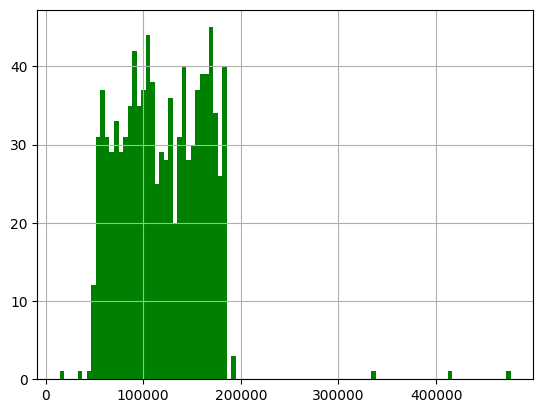

In [279]:

companies['Profit'].hist( color='g', bins=100);

array([[<Axes: title={'center': 'R&D Spend'}>,
        <Axes: title={'center': 'Administration'}>],
       [<Axes: title={'center': 'Marketing Spend'}>, <Axes: >]],
      dtype=object)

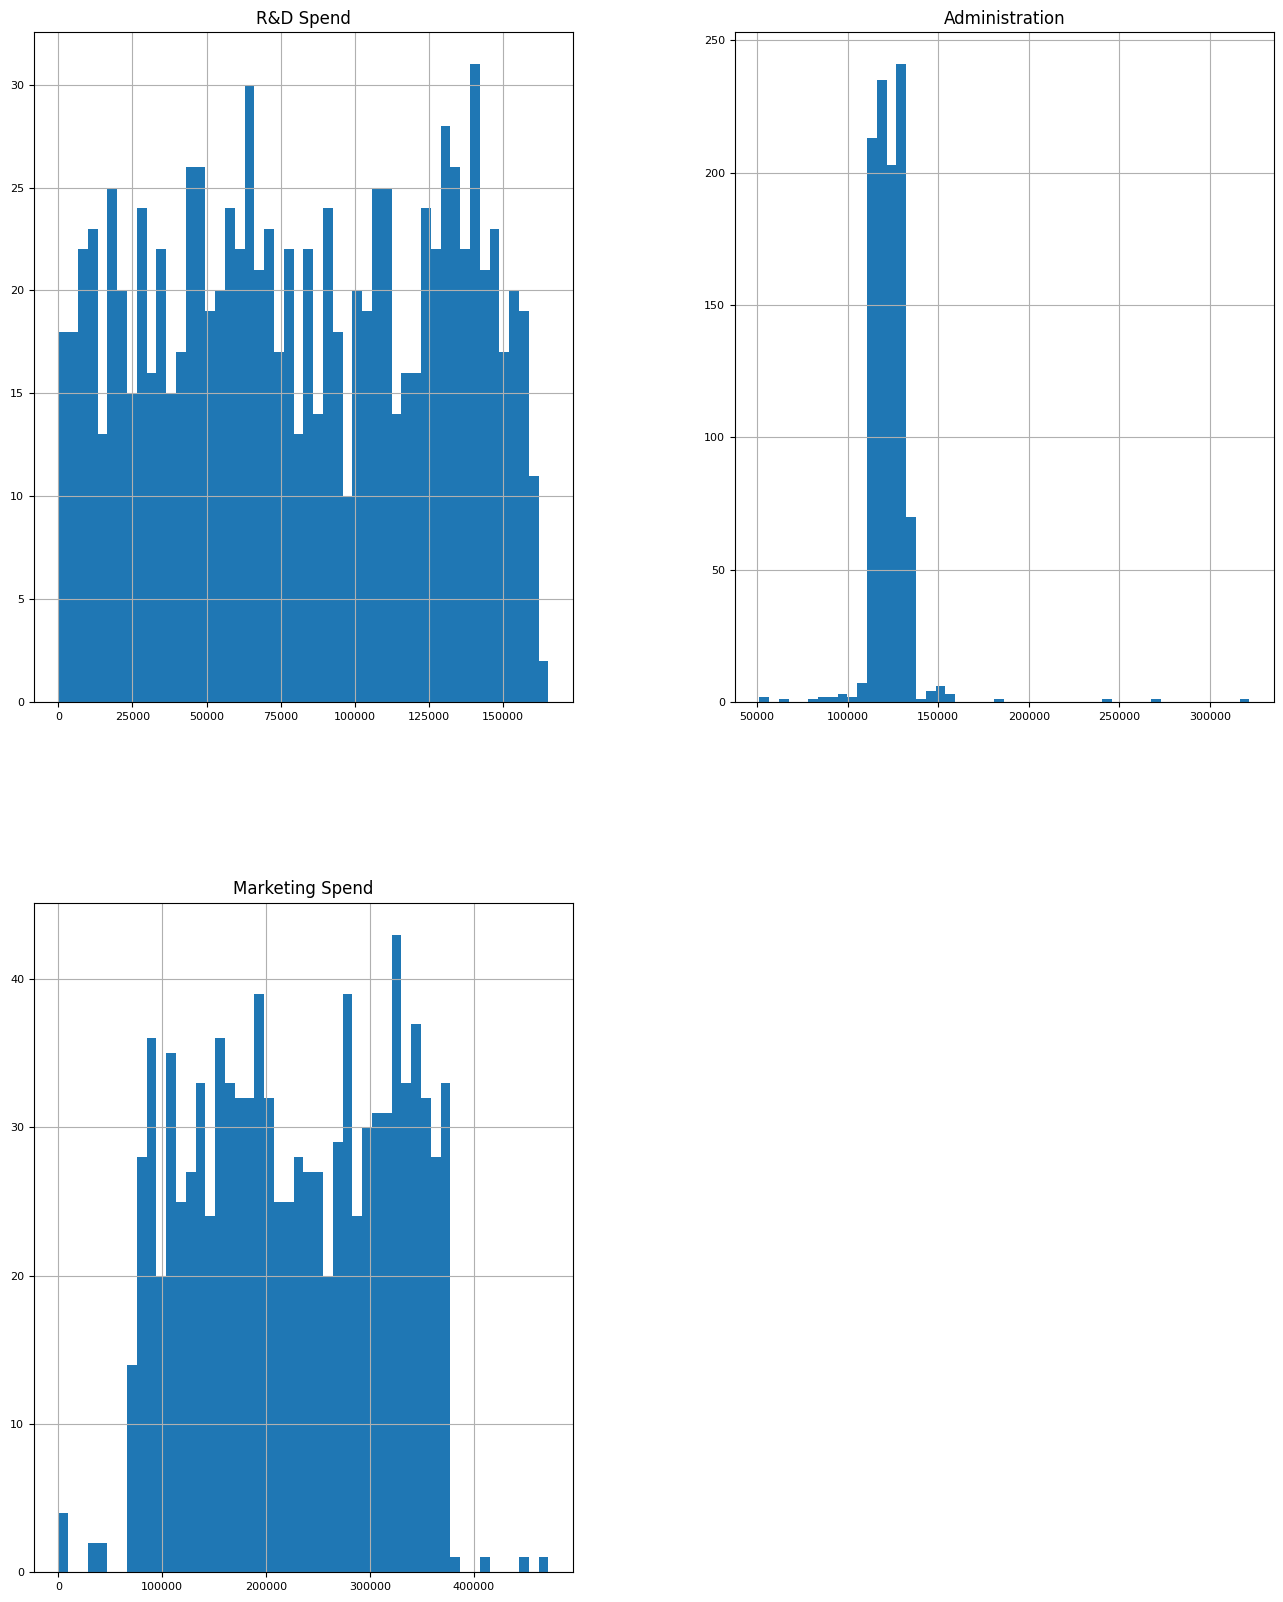

In [280]:
companies[[
  "R&D Spend", 
  "Administration", 
  "Marketing Spend"
]].hist(figsize=(16, 20), bins=50, xlabelsize=8, ylabelsize=8)

<Axes: >

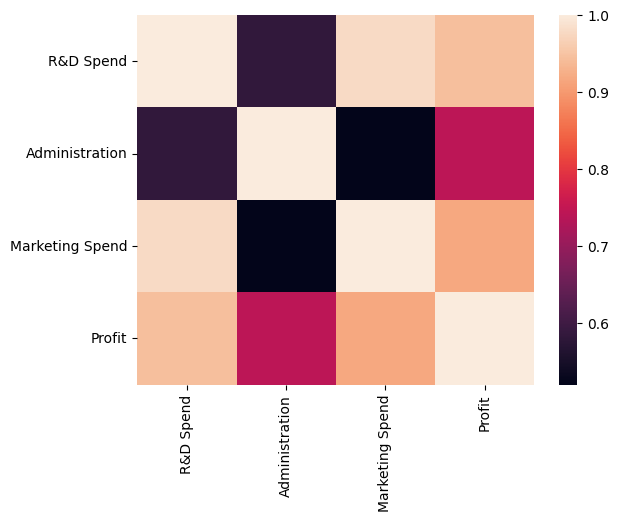

In [267]:
sns.heatmap(companies.corr())

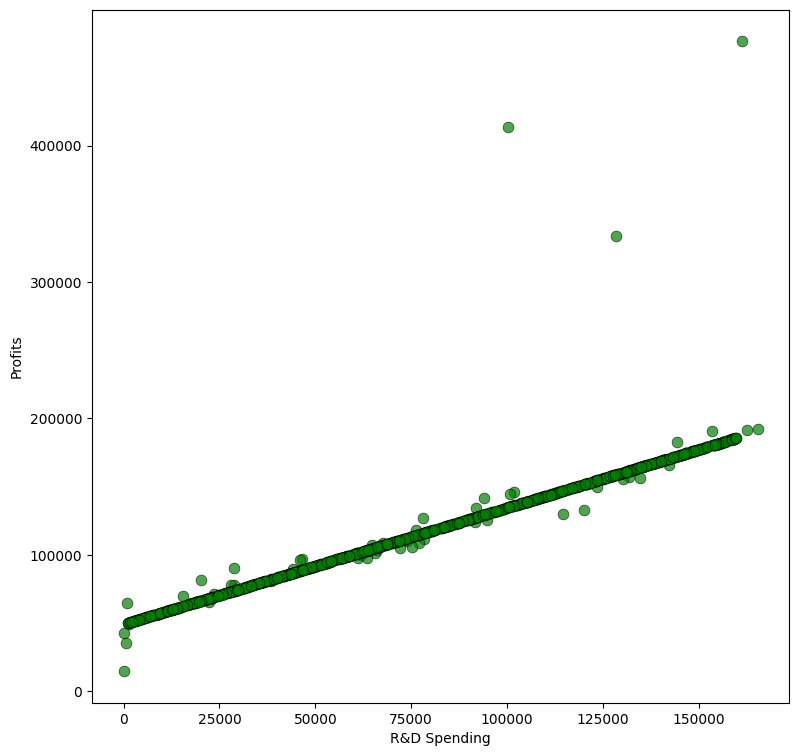

In [281]:
profits: DataFrame = companies[["Profit"]]
research_and_development_spending: DataFrame = companies[["R&D Spend"]]

figure, ax = plt.subplots(figsize = (9, 9))
plt.xlabel("R&D Spending")
plt.ylabel("Profits")
ax.scatter(
  research_and_development_spending, 
  profits, 
  s=60, 
  alpha=0.7, 
  edgecolors="k",
  color='g',
  linewidths=0.5
)

In [282]:
features: DataFrame = companies[[
    "R&D Spend", 
    "Administration", 
    "Marketing Spend",
]]
targets: DataFrame = companies[["Profit"]]

train_features, test_features, train_targets, test_targets = train_test_split(
  features, 
  targets,
  test_size=0.2
)

In [286]:
model: LinearRegression = LinearRegression()
model.fit(training_features, training_targets)

LinearRegression()

In [287]:
coefficients: List[List[float]]  = model.coef_

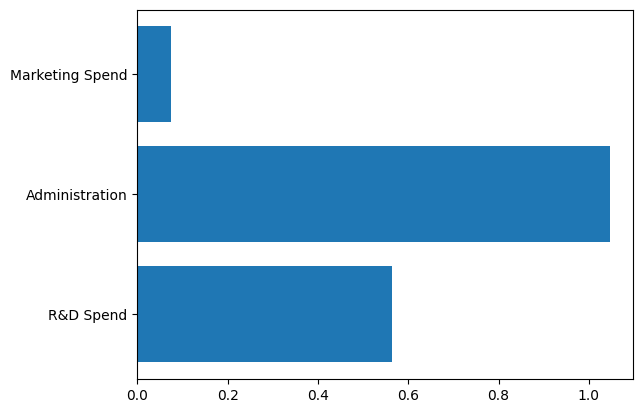

In [272]:
plt.figure()
plt.barh(training_features.columns, coefficients[0])
plt.show()

In [285]:
test_predictions: List[float] = model.predict(test_features)
root_squared_error: float = r2_score(test_targets, test_predictions)

In [ ]:
inference_request: DataFrame = pd.DataFrame([{"R&D Spend":165349.2, "Administration":136897.8, "Marketing Spend":471784.1 }])

In [228]:
inference: float = model.predict(inference_request)